1992    33312.107476
1993    41861.859541
1994    39493.304941
1995    47743.550969
dtype: float64


<IPython.core.display.Javascript object>


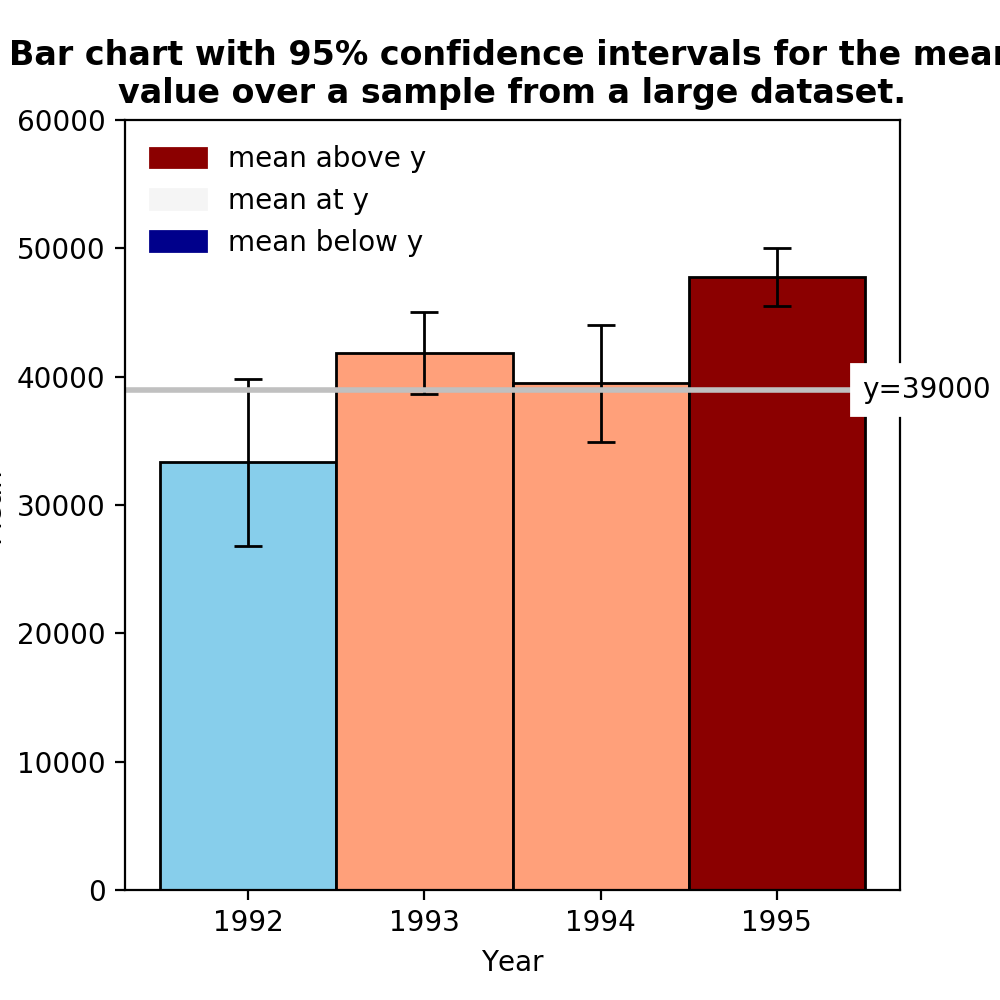

7

In [32]:
%matplotlib notebook
#%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import matplotlib.cm as cm
#from matplotlib.widgets import Slider, Button, RadioButtons
import matplotlib.patches as mpatches
import matplotlib as mpl
#from mpl_toolkits.axes_grid1 import make_axes_locatable
#import matplotlib.colors as colors

np.random.seed(12345)

df = pd.DataFrame([np.random.normal(32000,200000,3650), 
                   np.random.normal(43000,100000,3650), 
                   np.random.normal(43500,140000,3650), 
                   np.random.normal(48000,70000,3650)], 
                  index=[1992,1993,1994,1995])


df = df.transpose()
value = df.mean()


#std = df.std()
print(value)

# function to update bars according to y value
def update_bar_plot(y_value):
    # change bar colors based on y valye 
    for yer, rect in zip(error, barplot.get_children()):
        h = rect.get_height().round(2)
        #print(h,y_value)
        if ( h + yer <  y_value): 
            rect.set_color(colors[2])#darkblue
        if ( h - yer >  y_value): 
            rect.set_color(colors[0])#darkred
        if ((h - yer <  y_value) & (h + yer >  y_value) & (h < y_value)): 
            rect.set_color(colors[3])#lightblue
        if ((h - yer <  y_value) & (h + yer >  y_value) & (h > y_value)): 
            rect.set_color(colors[4])#lightred              
        if ((h == y_value)): 
            rect.set_color(colors[1])#white
        
        # set bars edge color   
        rect.set_edgecolor('black') 

    # setting x & y tick labels 
    plt.xticks(range(len(df.columns)), df.columns)
    plt.ylim(0,60000)
    #add_colorbar()

    
# function to update horizontal line according to y value getting from event
def update_y_line(y_value):
    
    # removing existing y line and corresponding text of y value 
    plt.gca().lines[2].remove()
    plt.gca().texts[-1].set_visible(False)
    
    # draw new horizontal/y line based on new y value 
    plt.axhline(y_value, color = 'silver', lw = 2)
    # set new 'y' value at the end of new horizontal/y line 
    plt.text(x=xmax+2.85, y=y_value, s='y={}'.format(round(y_value,2)), fontsize=10, va='center', ha='center', backgroundcolor='w')
        

# callback function for event manager
def update(event):
    update_bar_plot(event.ydata)
    update_y_line(event.ydata)
    y_value = event.ydata

# add bottom colorbar
# def add_colorbar():
#     divider = make_axes_locatable(plt.gca())
#     cmap = plt.get_cmap('RdBu_r', 11)
#     ax_cb = divider.new_vertical(size="4%", pad= 0.6, pack_start=True)    
#     cb1 = mpl.colorbar.ColorbarBase(ax_cb, cmap=cmap, orientation='horizontal')
#     cb1.ax.locator_params(nbins=11)
#     plt.gcf().add_axes(ax_cb)
     
    
# set initial y value and rounding if its float
y_value = 39000

# colors for bars
colors  = ['darkred','whitesmoke','darkblue', 'skyblue', 'lightsalmon']

fig = plt.figure(figsize=(5, 5))
xmin, xmax, ymin, ymax = plt.axis()

# set initial 'y' value at the end of horizontal line 
plt.text(x=xmax+2.85, y=y_value, s='y={}'.format(round(y_value,2)), fontsize=10, va='center', ha='center', backgroundcolor='w')

# calculating errors 
error = df.sem().values*1.96

# bar charts with error bars 
barplot = plt.bar(range(len(df.columns)),
        yerr = error,
        height = value,
        align = 'center',
        width=1,
        error_kw=dict(ecolor='black', lw=1, capsize=5, capthick=1)) 

# plot initial horizontal/y line for y value
plt.axhline(y_value, color = 'silver', lw = 2)

# patches for legends based on colors
above_patch = mpatches.Patch(color=colors[0], label='mean above y')
inrange_patch = mpatches.Patch(color = colors[1], label='mean at y')
below_patch = mpatches.Patch(color=colors[2], label='mean below y')

#set label, title & legend
plt.xlabel('Year')
plt.ylabel('Mean')
plt.title('Bar chart with 95% confidence intervals for the mean\nvalue over a sample from a large dataset.', 
          fontsize=12, fontweight="bold")
plt.legend(handles=[above_patch, inrange_patch, below_patch], loc='upper left', frameon=False, fontsize=10)


# update bar chart according to y value
update_bar_plot(y_value)


# connect 'update' function to the event manager
plt.gcf().canvas.mpl_connect('button_press_event', update)


#slider_ax = plt.axes([0.12, -0.008, 0.6, 0.04], facecolor='tan')
#yval = Slider(slider_ax, 'y', 0, 60000, valinit=42000)



<IPython.core.display.Javascript object>


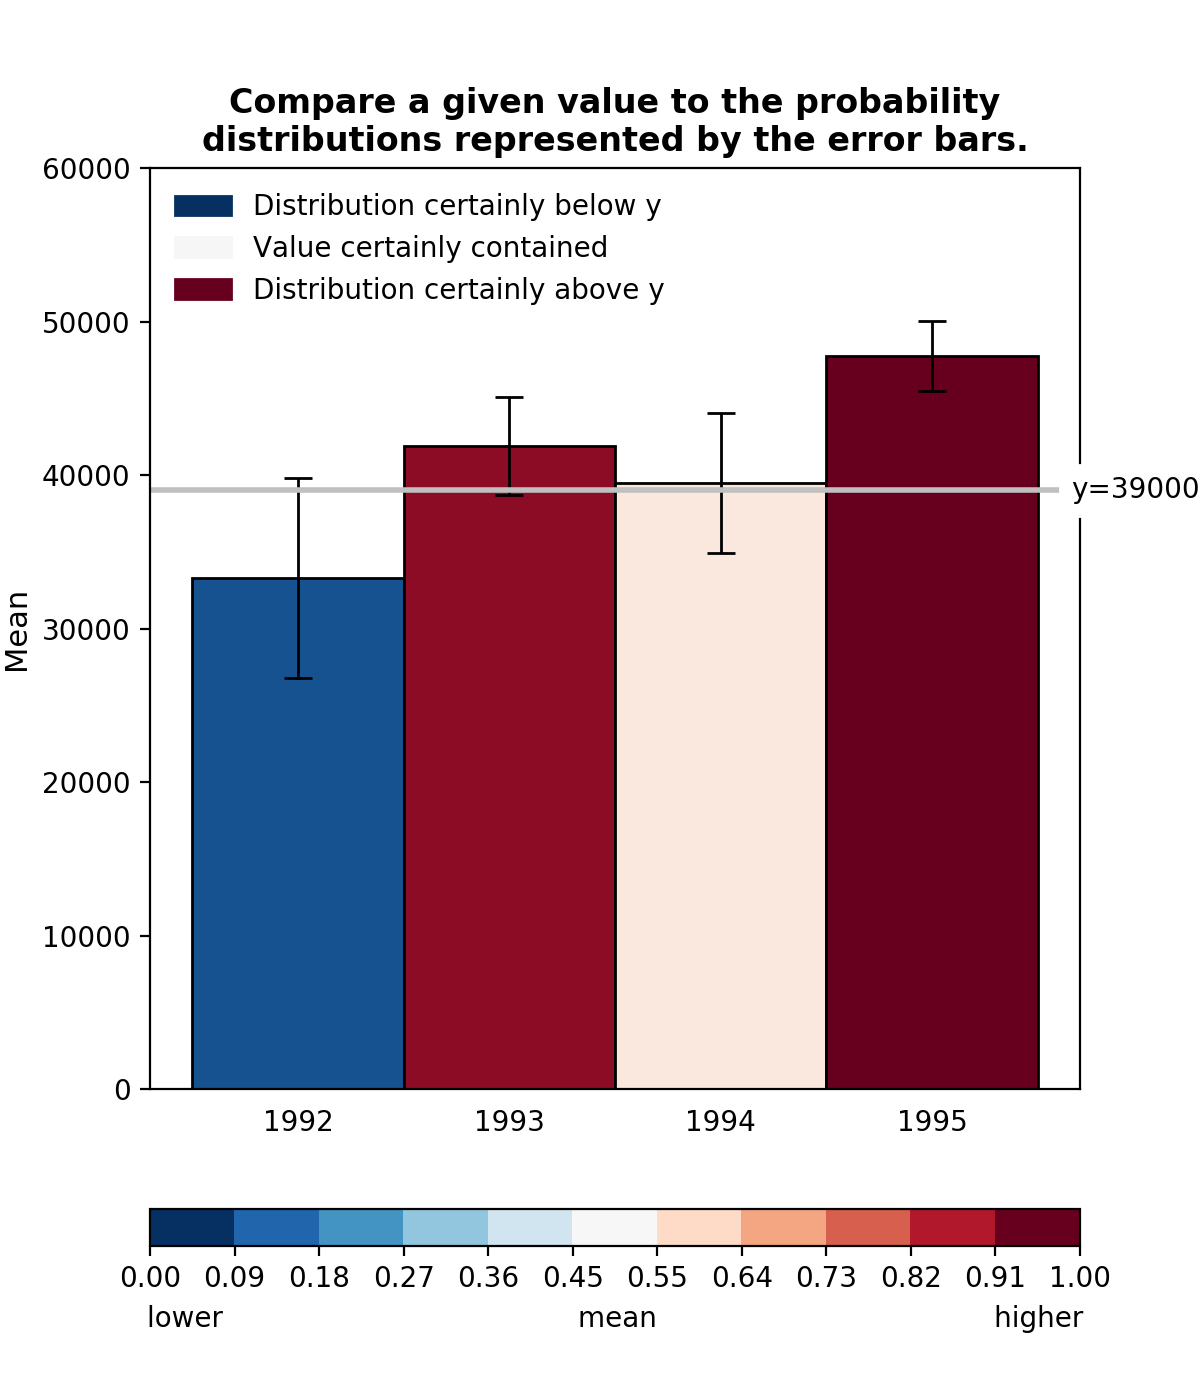

In [31]:
# Use the following data for this assignment:
%matplotlib notebook
#%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
import matplotlib.cm as cm
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.colorbar import ColorbarBase
from matplotlib.colors import BoundaryNorm
import matplotlib.patches as mpatches

np.random.seed(12345)

df = pd.DataFrame([np.random.normal(32000,200000,3650), 
                   np.random.normal(43000,100000,3650), 
                   np.random.normal(43500,140000,3650), 
                   np.random.normal(48000,70000,3650)], 
                  index=[1992,1993,1994,1995])


means = df.mean(axis=1) 
std = df.std(axis=1)/np.sqrt(df.shape[1])

y = 39000 

norm = Normalize(vmin=-1.96, vmax=1.96)
cmap = cm.get_cmap('RdBu_r')
df_colors = pd.DataFrame([])
df_colors['intensity'] = norm(((means-y)/std).values)
df_colors['color'] = [cmap(x) for x in df_colors['intensity']]

plt.figure(figsize=(6,7))
plt.ylim(0,60000)
#plt.xlabel('Year', fontsize=11)
plt.ylabel('Mean', fontsize=11)
plt.title('Compare a given value to the probability\ndistributions represented by the error bars.', 
          fontsize=12, fontweight="bold")

bar_plot = plt.bar(df.index, means, yerr=std*1.96, color=df_colors['color'], 
                   width=1, align='center', edgecolor='black',
                   error_kw=dict(ecolor='black', lw=1, capsize=5, capthick=1))

hoz_line = plt.axhline(y=y, color='silver', linewidth=2);
y_text = plt.text(1995.96, y, 'y=%d' %y, fontsize=10, va='center', ha='center', backgroundcolor='w');

above_patch = mpatches.Patch(color=cmap(0), label='Distribution certainly below y')
mid_patch = mpatches.Patch(color = cmap(.5), label='Value certainly contained')
below_patch = mpatches.Patch(color=cmap(cmap.N), label='Distribution certainly above y')
plt.legend(handles=[above_patch, mid_patch, below_patch], loc='upper left', frameon=False, fontsize=10)

plt.xticks(df.index, ('1992', '1993', '1994', '1995'));
plt.tick_params(axis='x', which='major', bottom=False, top=False, labelbottom=True) 


def add_colorbar():
    tick_val=[0.00,0.09,0.18,0.27,0.36,0.45,0.55,0.64,0.73,0.82,0.91,1.00]
    divider = make_axes_locatable(plt.gca())
    cmap = plt.get_cmap('RdBu_r', 11)
    norm = BoundaryNorm(tick_val, cmap.N)
    ax_cb = divider.new_vertical(size="4%", pad= 0.6, pack_start=True)    
    cb = ColorbarBase(ax_cb, cmap=cmap, orientation='horizontal', norm=norm,
                       extend='neither', ticks=tick_val, spacing='uniform')
    cb.ax.set_position((0.1, 0.45, 0.8, 0.1))
    cb.set_label('lower                                        mean                                      higher')
    plt.gcf().add_axes(ax_cb)
    
def update(event):
    for i in range(len(df.index)):
        shade = cmap(norm((means.values[i]-event.ydata)/std.values[i]))
        bar_plot[i].set_color(shade)
        bar_plot[i].set_edgecolor('black')
    hoz_line.set_ydata(event.ydata)
    y_text.set_text('y=%d' %event.ydata);
    y_text.set_position((1995.96, event.ydata));

add_colorbar()

plt.gcf().canvas.mpl_connect('button_release_event', update)

plt.savefig('assignment_3.png')